# A Newton-Raphson Fractal implementation

We will implement the fractal discussed here:
https://chalkdustmagazine.com/features/the-newton-raphson-fractal/

Basic Mandelbrot setup...

In [22]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

# Define a set of complex numbers as a grid of pixels (in a form of a matrix) with each element representing that pixel's
# location on the 2D plane as a complex number
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

# Iterate over the number to see if it is within reasonable stability after some number of iterations, if they do, keep them, otherwise discard
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask]

# Check whether a given complex number is stable under the funciton z = z**2 + c, where c is one of our numbers on the grid
# and the threshold controls the cutoff for the stability
def is_stable(c, num_iterations, thresh=2):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c
    return abs(z) <= thresh



C:\Users\dimit\AppData\Local\Temp\ipykernel_79988\19618101.py:21: RuntimeWarning: overflow encountered in square
  z = z ** 2 + c
C:\Users\dimit\AppData\Local\Temp\ipykernel_79988\19618101.py:21: RuntimeWarning: invalid value encountered in square
  z = z ** 2 + c


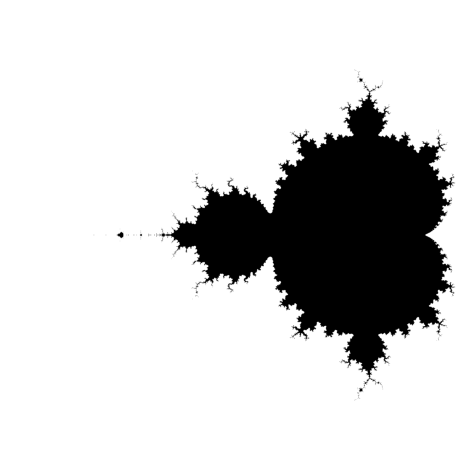

In [23]:
c = complex_matrix(-2.5, 0.5, -1.5, 1.5, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

Now we want to view the attractors of applying Newton-Raphson method to various points on a complex plane. We will be using the function from the site, that is $f(z)=z^3+1$. 

In [27]:
# The main function
def f(z):
    return z**3 + 1

# The derivative for the Newton's method
def fp(z):
    return 3*z**2

# The Newton-Raphson method
def newt_raph(z, eps=1e-10, max_iters=1000):
    Fz = lambda x: x - f(x)/fp(x)
    steps = list()
    i = 0
    z_old = z
    z_curr = Fz(z_old)
    steps.append(z)
    steps.append(z_curr)
    while i < max_iters and np.abs(z_curr-z_old)>eps:
        z_old = z_curr
        z_curr = Fz(z_old)
        steps.append(z_curr)
        i += 1
    if i == max_iters:
        print("Reached max iters...")  
    return z_curr, np.array(steps)

# The attractor is one of the solutions to the equation. Since our function is cubic, we have 3 possible solutions.
# We return the first closest attractor
def closest_attractor(attractors, point):
    # assuming point is very close to attractor...
    b_vals = np.isclose(np.linalg.norm(attractors-point, ord=2, axis=1), 0)
    return np.nonzero(b_vals)[0]

We can find the solutions to the original problem with some analytical stuff utilizing the De Moivre theorem. Given that $z\in \mathbb{C}$, we have that the roots of the function $f(z)$ must satisfy that $f(z)=z^3+1=0$ for some $z$. By De Moivre's theorem, $z^n=\rho^n(\cos{n\theta}+i\sin{n\theta})$. Thus $z^3=\rho^3(\cos{3\theta}+i\sin{3\theta})=-1$. Now a complex number of -1 means that the $\rho=-1$, since it means it's magnitude has to be -1. We can thus see that we must also have that $(\cos{3\theta}+i\sin{3\theta})=1$. That happens when $\theta=\frac{2}{3}k\pi$ for all integers $k$ since this gives $\cos{2k\pi}=1$ and $\sin{2k\pi}=0$. Since this is a cubic equation, we only need 3 solutions, so we choose $k=0,1,2$. Thus we get that $\theta_1=0,\theta_2=\frac{2\pi}{3},\theta_3=\frac{4\pi}{3}$. Putting that into the original equation for $z$ we get that $z_1=-1$, $z_2=\frac{1}{2}-i\frac{\sqrt{3}}{2}$, and $z_3=\frac{1}{2}+i\frac{\sqrt{3}}{2}$. These are our three attractors.

In [25]:
attractors = np.array([
    [-1, 0],
    [0.5, 0.8660254],
    [0.5, -0.8660254]
])

In [24]:
# Define the starting point
z = 1+1j

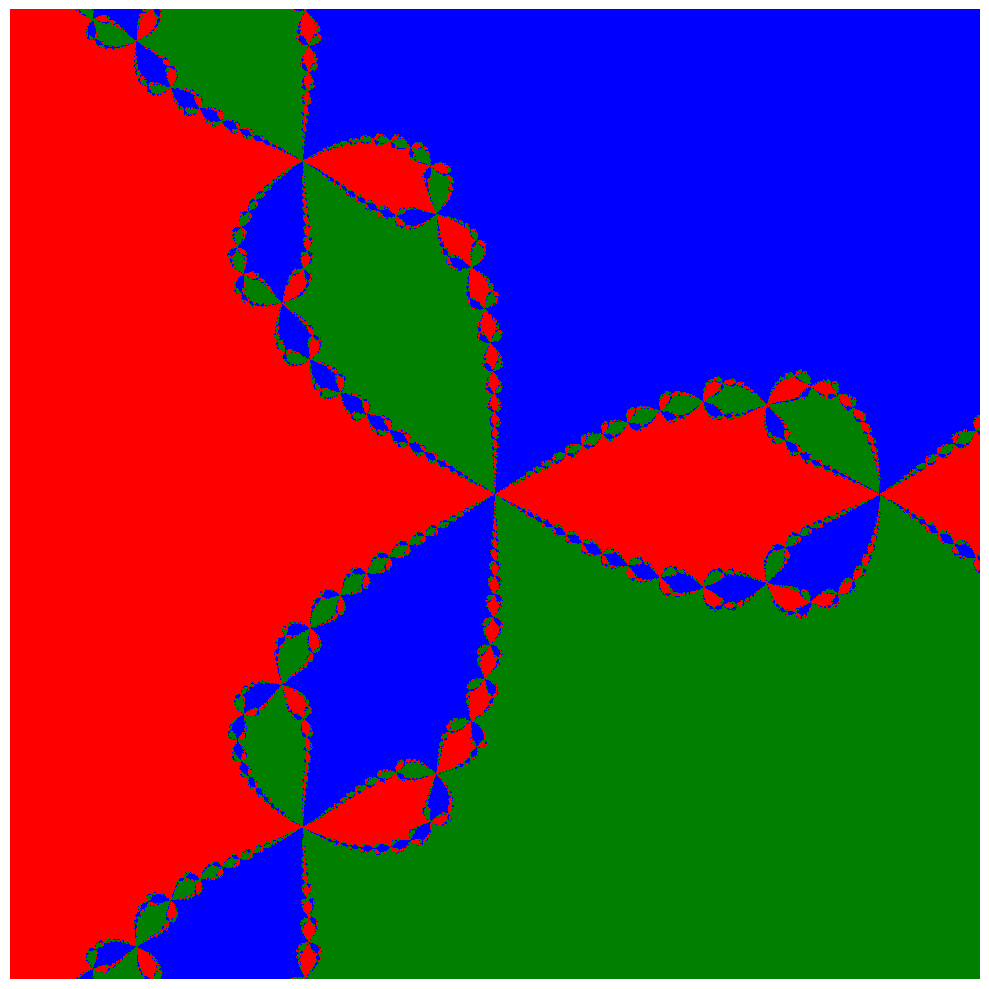

In [28]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

plt.figure(figsize=(15,10))
cmap = colors.ListedColormap(['r', 'g', 'b'])
# We get a square of size 2x2 with 512 elements in each unit, so 1024x1024 here.
c = complex_matrix(-1, 1, -1, 1, pixel_density=512)
# We need actual values for pixels that we will write out as an image
cors = np.zeros([c.shape[0], c.shape[1]])
# Now we run the Newton-Raphson method on each complex number in our square grid and see which of the attractors it ends up at.
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        z = c[i][j]
        out = newt_raph(z)[0]
        atr_choice = closest_attractor(attractors, np.array([out.real, out.imag]))[0]
        color = cmap(atr_choice)
        cors[i][j] = atr_choice
plt.imshow(cors, cmap=cmap)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

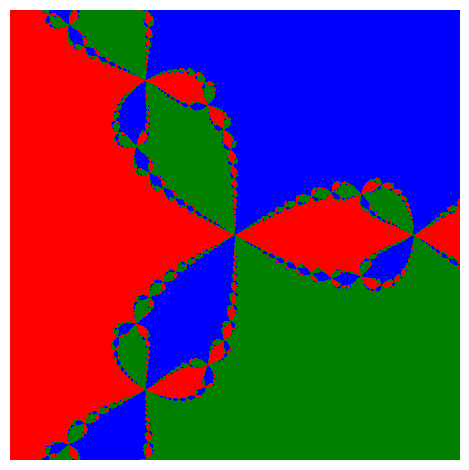

In [13]:
# Optionally save this to a figure
plt.imshow(cors, cmap=cmap)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.savefig('foo.png')
plt.show()